# Import all the necessary libraries

In [ ]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import minmax_scale
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import scipy.cluster.hierarchy as sch
!apt install chromium-chromedriver
!pip install selenium

from selenium import webdriver  # set options to be headless
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# open it, go to a website, and get results
#wd = webdriver.Chrome('chromedriver',options=options)
import time
import nltk
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

## import htmlimport 
from bs4 import BeautifulSoup
import re
import csv
import os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 14 not upgraded.
Need to get 80.1 MB of archives.
After this operation, 271 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 86.0.4240.75-0ubuntu0.18.04.1
Ign:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 86.0.4240.75-0ubuntu0.18.04.1
Ign:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 86.0.4240.75-0ubuntu0.18.04.1

# Part 1: Course curriculum design

In this part we will redesign the curriculum for MIE 1624 by using Web Scraping to Find the Most Demanded Programming Language for Data Science. The MIE1624 course is expected to be designed as a fundamental course for first-year Master Engineering students who have zero data analysis background.

Here, we will select different types of website to do web scraping in order to collect useful multi-source information from different fields, and fulfill various requirements for students who seek to find a data-based job:

Job Posting Website: Indeed and Workopolis (these have very useful information to satisfy students who want to find data-based jobs after graduation) are the top 10 job posting websites that consolidate the information in one place for the job seeker.
Web-based Big Dataset: Kaggle Dataset (Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.)
Educational Institution or website: DataCamp or Coursera (can be a reference guide that contains a large number of data-based courses. These are free resources for learning about data science these days)

### 1.1 Indeed Job Posting Website

Firstly, we want to figure out which programming language MIE1624 should be based on. A beautiful soup package was used to scrap the data science related job information on Indeed Website. The algorithm counts the frequency of appearance of each programming language.

In [ ]:
# Scrap indeed website, and store results in dataframe job_info
'''job_info = pd.DataFrame()
base = 'http://ca.indeed.com'

# Indeed displays ~10-15 jobs on each page, while each job itself can be identify as a page.
# So we search jobs every 10 pages.
# For 1000+ jobs, we need to go through 100+ pages with 10+ jobs on each page. 
pages = list(range(0,1100,10))
for page in pages:
  result = requests.get("https://ca.indeed.com/jobs?q=data+scientist&start="+str(page)).text
  soup = BeautifulSoup(result, 'lxml')
  
  for jobs in soup.find_all(class_ = "result"): 
    
    try:
      position_title = jobs.find('a', class_='jobtitle turnstileLink').text.strip()
    except:
      position_title = None
      
    try:
      employer = jobs.find('span', class_='company').text.strip()
    except:
      employer = None

    try:
      location = jobs.find('span', class_='location').text.strip()
    except:
      location = None
      
    try:
      salary = jobs.find('span', class_ = 'salaryText').text.strip()
    except:
      salary = None

    try:
      link = base + jobs.find('a').attrs['href']
    except:
      link = None
    
    job_info = job_info.append({
        'position_title': position_title, 
        'employer': employer,
        'location': location,
        'salary': salary,
        'link': link}, ignore_index = True)

#Delect dulicate jobs
job_info = job_info.drop_duplicates(['link'], keep='first')'''

'job_info = pd.DataFrame()\nbase = \'http://ca.indeed.com\'\n\n# Indeed displays ~10-15 jobs on each page, while each job itself can be identify as a page.\n# So we search jobs every 10 pages.\n# For 1000+ jobs, we need to go through 100+ pages with 10+ jobs on each page. \npages = list(range(0,1100,10))\nfor page in pages:\n  result = requests.get("https://ca.indeed.com/jobs?q=data+scientist&start="+str(page)).text\n  soup = BeautifulSoup(result, \'lxml\')\n  \n  for jobs in soup.find_all(class_ = "result"): \n    \n    try:\n      position_title = jobs.find(\'a\', class_=\'jobtitle turnstileLink\').text.strip()\n    except:\n      position_title = None\n      \n    try:\n      employer = jobs.find(\'span\', class_=\'company\').text.strip()\n    except:\n      employer = None\n\n    try:\n      location = jobs.find(\'span\', class_=\'location\').text.strip()\n    except:\n      location = None\n      \n    try:\n      salary = jobs.find(\'span\', class_ = \'salaryText\').text.strip()\

In [ ]:
#read the scraped file
job_info = pd.read_csv('indeed.csv')

In [ ]:
job_info.head()

,Unnamed: 0,employer,link,location,position_title,salary
0,0,Canadian National Railway,http://ca.indeed.com/cmp/Canadian-National-Rai...,NaN,Data Scientist,NaN
1,1,Chata Technologies Inc,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist - NLP,NaN
2,2,Sun Life Financial,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Senior Data Scientist,NaN
3,3,Staffinity Inc.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist/Machine Learning Engineer,"$80,000 - $120,000 a year"
4,4,Canadian National Railway,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Specialist System Design, Data Scientist Machi...",NaN


In [ ]:
job_info["position_title"] = job_info["position_title"].replace('', np.nan)
job_info = job_info.dropna(subset=['position_title'])
job_info.shape

(728, 6)

In [ ]:
# List possible skill requirements
technical_skill = ['excel', 'python', 'r', 'java', 'c', 'c++', 'matlab', 'sas','sql', 
                   'tableau', 'hadoop', 'spark','power bi',
                   'tensorflow', 'keras','pytorch','theano','caffe']
business_skill = ['communication', 'problem solving', 'project management', 'consulting', 
                  'presentation', 'leadership', 'documentation', 'marketing','lead', 
                  'time management', 'collaborate', 'organize']
skills = technical_skill + business_skill 
# Add columns for skills
for skill in skills:
  job_info[skill] = np.zeros(len(job_info))

job_info.head()

,Unnamed: 0,employer,link,location,position_title,salary,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize
0,0,Canadian National Railway,http://ca.indeed.com/cmp/Canadian-National-Rai...,NaN,Data Scientist,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Chata Technologies Inc,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist - NLP,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Sun Life Financial,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Senior Data Scientist,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Staffinity Inc.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist/Machine Learning Engineer,"$80,000 - $120,000 a year",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Canadian National Railway,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Specialist System Design, Data Scientist Machi...",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
job_info = job_info.reset_index()

In [ ]:
# For each job, check its job details/description page
# to collect the required skills.
# Set skill entries to 1 if they are mentioned in job details

for i in range(len(job_info)):
  link = requests.get(job_info.iloc[i,3])
  soup = BeautifulSoup(link.text, "lxml")
  try:
    text = soup.find('div', class_ = 'jobsearch-jobDescriptionText').text.strip().lower()
    # Preprocessing, replace punctuations, and replace multiple spaces
    text = re.sub(r'\,', ' ', text) 
    text = re.sub('/', ' ', text) 
    text = re.sub(r'\(', ' ', text) 
    text = re.sub(r'\)', ' ', text) 
    text = re.sub(' +',' ',text) 
  except:
    text = ""

  for s in skills :
    # This is specifically for C++, escape the ++. Convert C++ to C\+\+
    if any(x in s for x in ['+']):
      skill = re.escape(s)
    else:
      skill = s
    matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',text)
    if matching:
      job_info[s][i] = 1
      #print("matched skill ",s, "for job ",str(i+1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_tech = job_info[technical_skill]
tech_count = df_tech.sum()
tech_count = tech_count.sort_values(ascending=False)
df_tcount = pd.DataFrame(data=tech_count,columns=["Count"])
df_tcount.index.name = "Technical Skills"
df_tcount

,Count
Technical Skills,
python,109.0
sql,71.0
r,54.0
tensorflow,35.0
spark,29.0
pytorch,28.0
tableau,19.0
hadoop,18.0
c++,15.0


Text(0.5, 1.0, 'Technical Skills Demand for Data Science Jobs on Indeed.ca')

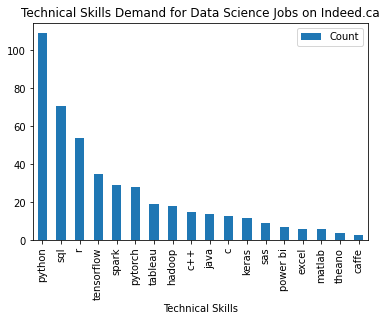

In [ ]:
df_tcount.plot(kind="bar")
plt.title('Technical Skills Demand for Data Science Jobs on Indeed.ca')

In [ ]:
df_bus = job_info[business_skill]
bus_count = df_bus.sum()
bus_count = bus_count.sort_values(ascending=False)
df_bcount = pd.DataFrame(data=bus_count,columns=["Count"])
df_bcount.index.name = "Business Skills"
df_bcount

,Count
Business Skills,
communication,77.0
lead,33.0
collaborate,29.0
marketing,25.0
documentation,21.0
leadership,18.0
problem solving,16.0
presentation,14.0
consulting,14.0


Text(0.5, 1.0, 'Business Skills Demand for Data Science Jobs on Indeed.ca')

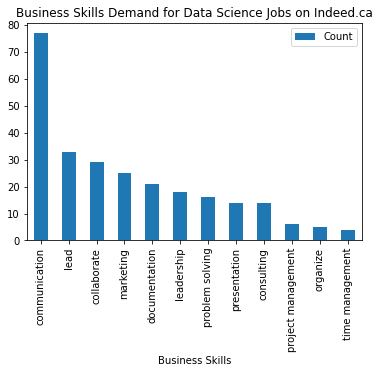

In [ ]:
df_bcount.plot(kind="bar")
plt.title('Business Skills Demand for Data Science Jobs on Indeed.ca')

### 1.2 Workopolis Job Posting Website

In [ ]:
# Scrap workopolis website, and store results in dataframe job_info
# here we comment the scraping code, just read the corresponding file directly
'''job_info2 = pd.DataFrame()

# For workopolis, each page only displays ~25 jobs, 
# hence for each 1000 jobs (assuming there is more than 1000 data science jobs listed)
# we need to go through 50 pages

base = "https://www.workopolis.com"
w_link = "https://www.workopolis.com/jobsearch/find-jobs?ak=data+scientist&lg=en&pn="
result = ""
for i in range(1,51):
    page = w_link + str(i)
    curr_r = requests.get(page).text
    result = result + curr_r

soup = BeautifulSoup(result, 'lxml')

for jobs in soup.find_all("article",class_ = "JobCard"): 
  try:
    position_title = jobs.find('h2', class_ = 'JobCard-title').text.strip()
  except:
    position_title = None

  try:
    employer = jobs.find('div',attrs={'class': 'JobCard-property JobCard-company'}).find('span').text.strip()
  except:
    employer = None

  try:
    location = jobs.find('span', class_ = 'JobCard-property JobCard-location').text.strip()
  except:
    location = None

  try:
    link = jobs.find('h2', attrs={'class': 'JobCard-title'}).find('a', href=True)['href']
  except:
    link = None

  try:
    salary = jobs.find('span', class_ = 'Salary').text.strip()
  except:
    location = None

  job_info2 = job_info2.append({
      'position_title': position_title, 
      'employer': employer,
      'location': location,
      'link': link,
      'estimated_salary': salary}, ignore_index = True)'''
  
#read the scraped file
job_info2 = pd.read_csv('workopolis.csv')

In [ ]:
# Save to local
#job_info2.to_csv("/content/workopolis.csv")

In [ ]:
job_info2.head()

,Unnamed: 0,employer,estimated_salary,link,location,position_title
0,0,MSi Corp (Bell Canada),$60 - $70 an hour,/jobsearch/viewjob/vIutwtUUWteTuDjx9sbKUTlmnWN...,"— Montréal, QC",Senior BI Manager
1,1,Boast.AI,"$80,000 - $110,000 a year",/jobsearch/viewjob/S46fTyLkSqiRQakPxFbLNqHTG5y...,"— Calgary, AB",Machine Learning Engineer
2,2,Onstream Pipeline Inspection Services Inc.,"Estimated: $58,000 - $79,000 a year",/jobsearch/viewjob/wCEzOGk-MCQVLGXu5rLqYn5wjqm...,"— Calgary, AB",Tethered Inspection Senior Data Analyst
3,3,Yelp,"Estimated: $64,000 - $87,000 a year",/jobsearch/viewjob/yMpYOTSrFli_UUO9o5DHYfyVuYr...,— Remote,Data Analyst (Remote)
4,4,OGGN Inc.,"Estimated: $87,000 - $120,000 a year",/jobsearch/viewjob/pagg-CAjNdgvu33dq6Y20-ZpdrZ...,— Remote,Data Scientist (AI/ML)


In [ ]:
job_info2["position_title"] = job_info2["position_title"].replace('', np.nan)
job_info2 = job_info2.dropna(subset=['position_title'])
job_info2.shape

(1441, 6)

In [ ]:
# List possible skill requirements
technical_skill = ['excel', 'python', 'r', 'java', 'c', 'c++', 'matlab', 'sas','sql', 
                   'tableau', 'hadoop', 'spark','power bi',
                   'tensorflow', 'keras','pytorch','theano','caffe']
business_skill = ['communication', 'problem solving', 'project management', 'consulting', 
                  'presentation', 'leadership', 'documentation', 'marketing','lead', 
                  'time management', 'collaborate', 'organize']
skills = technical_skill + business_skill 

# Add columns for skills
for skill in skills:
  job_info2[skill] = np.zeros(len(job_info2))

In [ ]:
job_info2.head()

,Unnamed: 0,employer,estimated_salary,link,location,position_title,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize
0,0,MSi Corp (Bell Canada),$60 - $70 an hour,/jobsearch/viewjob/vIutwtUUWteTuDjx9sbKUTlmnWN...,"— Montréal, QC",Senior BI Manager,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Boast.AI,"$80,000 - $110,000 a year",/jobsearch/viewjob/S46fTyLkSqiRQakPxFbLNqHTG5y...,"— Calgary, AB",Machine Learning Engineer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Onstream Pipeline Inspection Services Inc.,"Estimated: $58,000 - $79,000 a year",/jobsearch/viewjob/wCEzOGk-MCQVLGXu5rLqYn5wjqm...,"— Calgary, AB",Tethered Inspection Senior Data Analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Yelp,"Estimated: $64,000 - $87,000 a year",/jobsearch/viewjob/yMpYOTSrFli_UUO9o5DHYfyVuYr...,— Remote,Data Analyst (Remote),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,OGGN Inc.,"Estimated: $87,000 - $120,000 a year",/jobsearch/viewjob/pagg-CAjNdgvu33dq6Y20-ZpdrZ...,— Remote,Data Scientist (AI/ML),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
job_info2 = job_info2.reset_index()

In [ ]:
job_info2['location'] = job_info2.location.str.replace('—','')
job_info2['link'] = 'https://www.workopolis.com' + job_info2['link'].astype(str)
job_info2.head()

,index,Unnamed: 0,employer,estimated_salary,link,location,position_title,excel,python,r,java,c,c++,matlab,sas,sql,tableau,hadoop,spark,power bi,tensorflow,keras,pytorch,theano,caffe,communication,problem solving,project management,consulting,presentation,leadership,documentation,marketing,lead,time management,collaborate,organize
0,0,0,MSi Corp (Bell Canada),$60 - $70 an hour,https://www.workopolis.com/jobsearch/viewjob/v...,"Montréal, QC",Senior BI Manager,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,Boast.AI,"$80,000 - $110,000 a year",https://www.workopolis.com/jobsearch/viewjob/S...,"Calgary, AB",Machine Learning Engineer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,Onstream Pipeline Inspection Services Inc.,"Estimated: $58,000 - $79,000 a year",https://www.workopolis.com/jobsearch/viewjob/w...,"Calgary, AB",Tethered Inspection Senior Data Analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,Yelp,"Estimated: $64,000 - $87,000 a year",https://www.workopolis.com/jobsearch/viewjob/y...,Remote,Data Analyst (Remote),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,OGGN Inc.,"Estimated: $87,000 - $120,000 a year",https://www.workopolis.com/jobsearch/viewjob/p...,Remote,Data Scientist (AI/ML),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# For each job, check its job details/description page to collect the required skills.
# Set skill entries to 1 if they are mentioned in job details

for i in range(len(job_info2)):
  link = requests.get(job_info2['link'][i])
  soup = BeautifulSoup(link.text, "lxml")
  try:
    text = soup.find("div", {'class' : 'viewjob-content'}).text.strip().lower()
    # Preprocessing, replace punctuations, and replace multiple spaces
    text = re.sub(r'\,', ' ', text) 
    text = re.sub('/', ' ', text) 
    text = re.sub(r'\(', ' ', text) 
    text = re.sub(r'\)', ' ', text) 
    text = re.sub(' +',' ',text) 
  except:
    text = "" 

  for s in skills :
    # This is specifically for C++, escape the ++. Convert C++ to C\+\+
    if any(x in s for x in ['+']):
      skill = re.escape(s)
    else:
      skill = s
    matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',text)
    if matching:
      # print("matched skill ",s, "for job ",str(i+1))
      job_info2[s][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Sanity check
job_info2['excel'].sum()

125.0

In [ ]:
## Summing up for technical skill data
df_tech = job_info2[technical_skill]
tech_count = df_tech.sum()
tech_count = tech_count.sort_values(ascending=False)
df_tcount = pd.DataFrame(data=tech_count,columns=["Count"])
df_tcount.index.name = "Technical Skills"
df_tcount
#plt.bar(,tech_count.to_list)

,Count
Technical Skills,
python,873.0
sql,662.0
spark,453.0
c++,314.0
java,264.0
r,257.0
hadoop,248.0
c,219.0
tableau,207.0


Text(0.5, 1.0, 'Technical Skills Demand for Data Science Jobs on Workopolis')

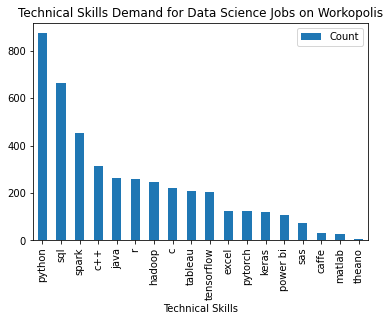

In [ ]:
## Create plot for visualization
df_tcount.plot(kind="bar")
plt.title('Technical Skills Demand for Data Science Jobs on Workopolis')

In [ ]:
## Summing up for business skill data
df_bus = job_info2[business_skill]
bus_count = df_bus.sum()
bus_count = bus_count.sort_values(ascending=False)
df_bcount = pd.DataFrame(data=bus_count,columns=["Count"])
df_bcount.index.name = "Business Skills"
df_bcount
#plt.bar(,tech_count.to_list)

,Count
Business Skills,
communication,753.0
lead,306.0
documentation,204.0
collaborate,193.0
problem solving,186.0
presentation,171.0
marketing,145.0
leadership,135.0
consulting,93.0


Text(0.5, 1.0, 'Business Skills Demand for Data Science Jobs on Workopolis')

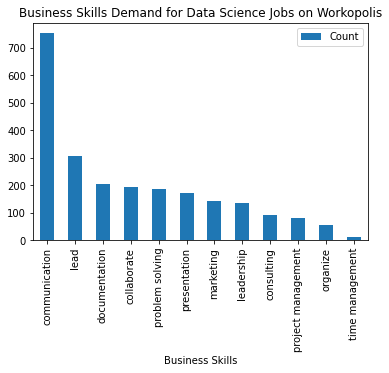

In [ ]:
## Create plot for visualization
df_bcount.plot(kind="bar")
plt.title('Business Skills Demand for Data Science Jobs on Workopolis')

Finding: (since the website updates the information everyday, the results may chage evrytime when we run it) Based on the web-scrapped results obtained from Workopolis and Indeed Job Posting Website, we can observe that the top 2 most popular technical skills required by data-based jobs are Python, Sql. This means our Python will still be the basis fundamental for MIE1624 course, while it can also contain some background introduction about how to use Sql, Spark and C++. 

For the business skills, communication and leadership are the two most important skills for a candidate that each company is looking for. Therefore, the MIE1624 course should contain some group projects and regular presentation assignments for the students to improve their team work skills including communication, leadership and collabration.  

### 1.3 Kaggle Survey Investigation

Besides scrapping Indeed website, we also use Kaggle Survey 2019 for our investigation.

In [ ]:
## Import Kaggle dataset
df = pd.read_csv("Kaggle_Salary.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,73,77,81,94,96,109,114,115,130,139,146,147,153,154,167,171,175,180,193,206,212,219,224,228,231,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,

Data Cleaning

In [ ]:
## Clean the dataset
df = df.loc[df['Q10_Encoded']>2] ## We excludepeople who made extremely low salary

In [ ]:
## Let's see what skills do these people obtain.
# Here we only consider North America 

df1 = df.loc[df['Q3']== 'Canada']
df2 = df.loc[df['Q3']== 'United States of America']
df3 = pd.concat([df1,df2],axis=0)
df3.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
63,485,35-39,Male,-1,Canada,Doctoral degree,Research Scientist,-1,"1000-9,999 employees",20+,We use ML methods for generating insights (but...,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,NaN,Experimentation and iteration to improve exist...,Do research that advances the state of the art...,NaN,NaN,-1,"125,000-149,999","$1000-$9,999",Twitter (data science influencers),NaN,"Reddit (r/machinelearning, r/datascience, etc)",NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,Cloudera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,MySQL,PostgresSQL,SQLite,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,11.0,"125,000-149,9991"
67,414,30-34,Male,-1,Canada,Master’s degree,Business Analyst,-1,"1000-9,999 employees",3-4,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,NaN,NaN,NaN,NaN,NaN,-1,"70,000-79,999","> $100,000 ($USD)",Twitter (data science influencers),NaN,"Reddit (r/machinelearning, r/datascience, etc)",NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,7.0,"70,000-79,999"
71,680,30-34,Male,-1,Canada,Doctoral degree,Research Scientist,-1,0-49 employees,1-2,We use ML methods for generating insights (but...,NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,NaN,NaN,-1,"60,000-69,999",$100-$999,NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,edX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,6.0,"60,000-69,999"
154,274,25-29,Male,-1,Canada,Master’s degree,Data Scientist,-1,0-49 employees,20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,NaN,Experimentation and iteration to improve exist...,NaN,NaN,NaN,-1,"40,000-49,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,4.0,"40,000-49,999"
155,814,25-29,Female,-1,Canada,Master’s degree,Data Scientist,-1,250-999 employees,10-14,We use ML methods for generating insights (but...,NaN,NaN,NaN,Build and/or run a machine learning servic

First Data Science Programming Language Recommendation

In [ ]:
df.Q19.unique() ##Obatin all type of responses 

array(['Python', 'Java', 'R', 'SQL', nan, 'C++', 'MATLAB', 'Other',
       'None', 'C', 'Javascript', 'Bash', 'TypeScript'], dtype=object)

Text(0.5, 1.0, 'What programming language would you recommend an aspiring data scientist to learn first?')

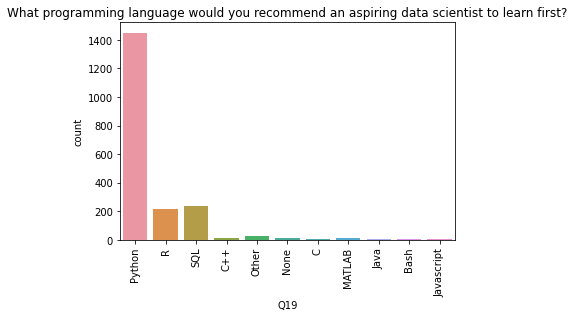

In [ ]:
# Determine which programming language should be used for data science course
# Plot the number of occurances for each type of language
sns.countplot(x = 'Q19', data = df3)
plt.xticks(rotation = 90)
plt.title("What programming language would you recommend an aspiring data scientist to learn first?")

Text(0.5, 1.0, 'What programming language would you recommend an aspiring data scientist to learn first(for each degree)')

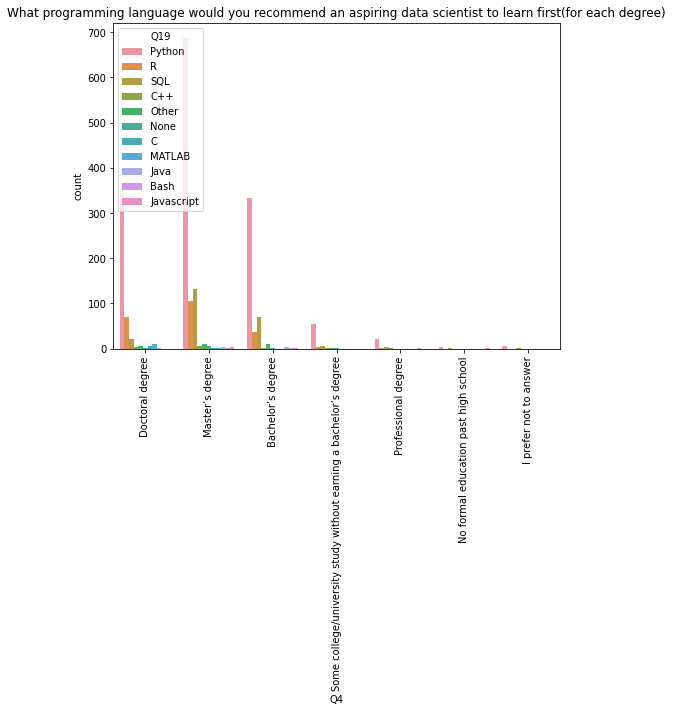

In [ ]:
## Education level is strongly related to the programming language since higher degree people have higher probability to use programming. 
# Plot the number of people that have different education level by different recommanded programming language
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Q4', hue = 'Q19', data=df3)
plt.xticks(rotation = 90)
plt.title('What programming language would you recommend an aspiring data scientist to learn first(for each degree)')
## All of people with different level of education always recommened Python. 

Primary Tools Used to Analyze Data

Text(0.5, 1.0, 'What is the primary tool that you use at work or school to analyze data?')

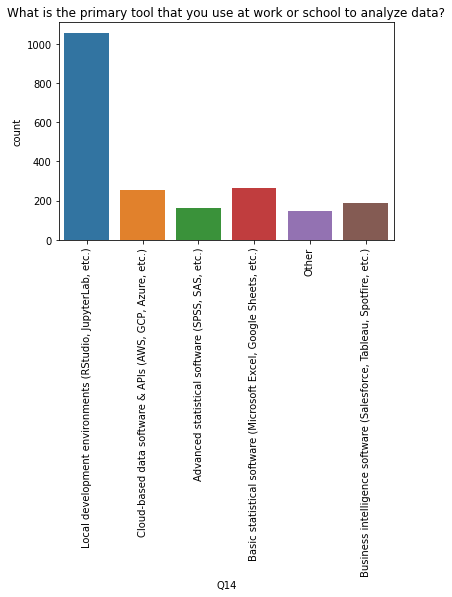

In [ ]:
## in order to determine which specific tool is recommended to analyze data
# Plot the number of occurances for each primary tool used for entire non-null value
sns.countplot(x = 'Q14', data = df3)
plt.xticks(rotation = 90)
plt.title("What is the primary tool that you use at work or school to analyze data?")

Text(0.5, 1.0, 'What is your primary tool to use at work or school to analyze data (for each degree)')

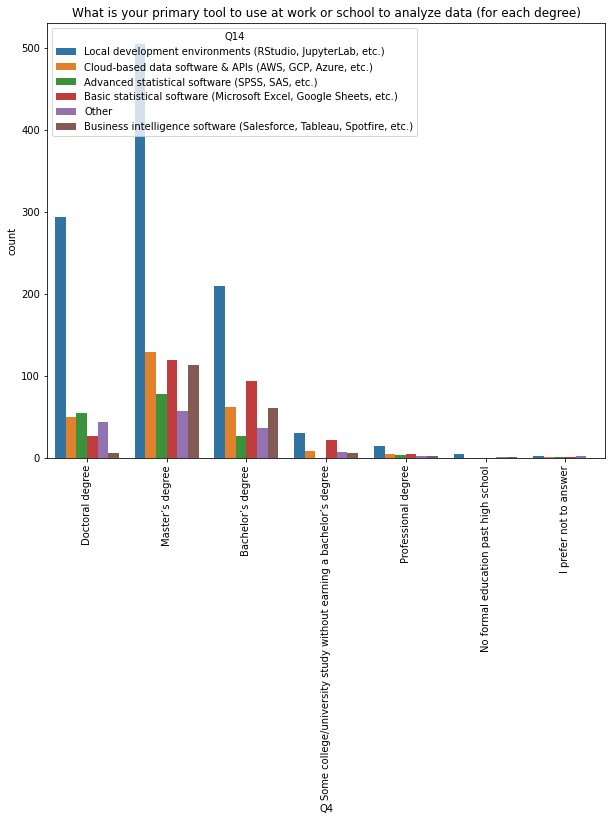

In [ ]:
## ## Education level is strongly related to the data analysis since higher degree people have higher probability to use data analysis tool. 
# Plot the number of people that have different education level by different data analysis tools used 
fig = plt.figure(figsize=(10,8))
sns.countplot(x='Q4', hue = 'Q14', data=df3)
plt.xticks(rotation = 90)
plt.title('What is your primary tool to use at work or school to analyze data (for each degree)')
## All of people with different level of education always recommened Local development environments to analyze data. 

Text(0.5, 1.0, 'What is your primary tool to use at work or school to analyze data (for each income level group)')

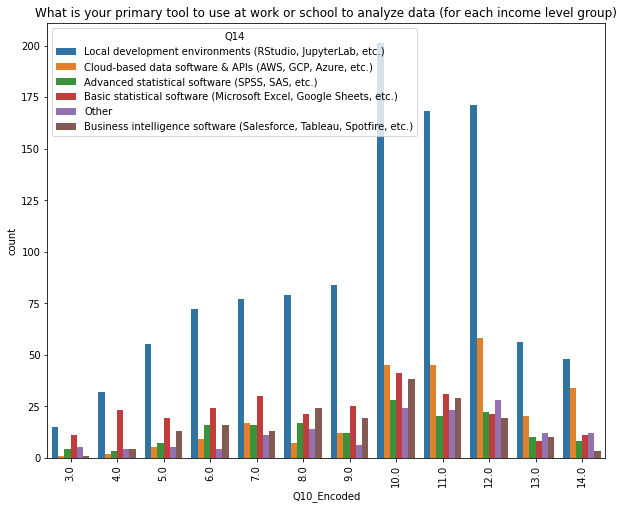

In [ ]:
# Q10 yearly income can also ba a reference guide
# Plot the number of people that have different yearly income by different data analysis tools used 
fig = plt.figure(figsize=(10,8))
sns.countplot(x='Q10_Encoded', hue = 'Q14', data=df3)
plt.xticks(rotation = 90)
plt.title('What is your primary tool to use at work or school to analyze data (for each income level group)')
## All of people with different level of yearly income always recommened Local development environments to analyze data.

IDE Selection

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

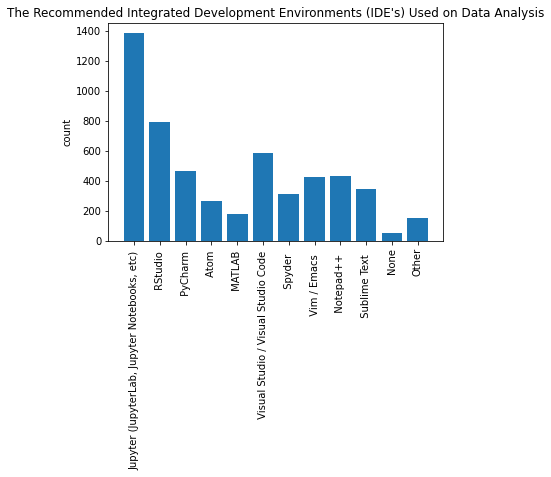

In [ ]:
## After the data analyze tool has been determmined (Local development environments)
## We need to determine which specific Local development environments is recommended

dfsub = df3.iloc[:,56:68]
dfsub = dfsub.fillna(0)
namelist = []
numlist = []
for i in dfsub.columns:
  for a in dfsub[i].unique().tolist():
    if a !=0:
      namelist.append(a)
      numlist.append(dfsub[i].tolist().count(a))
plt.bar(namelist,numlist)
plt.title("The Recommended Integrated Development Environments (IDE's) Used on Data Analysis")
plt.ylabel("count")
plt.xticks(rotation=90)

Findings:

Kaggle Survey also shows that Python is always recommended as the first data analysis programming anguage for an aspiring data scientist to learn (recommended by people with different education level Q19). Local development envronment is the primary tool that most Master students use at work or school to analyze data (recommended by people with different education level Q19 and different education level Q10). Besides, Jupyter is the most recommended Integrated Development Environments (IDE's) to be used on data analysis. Thus, Python is the most popular language, and Jupyter notebook is the most popular IDE. MIE1624 course is recommended to select Python as the major programming topic and Jupyter notebook is designed as the recommended IDE for students to utilize Python. The details are written in the report. 

# Part 2:  Data Science program curriculum design

The "ds_general_skills_revised.csv" file from Kaggle website summaries the Most Demand Skills for Data Scientists from several job posting websites. It's a dataset which contains the keywords frequency on several job finding websites. The goal is to design a sequence of courses which are included inside a new technically- and business-oriented program that can be used by University of Toronto.

In [ ]:
df = pd.read_csv("ds_general_skills_revised.csv")

In [ ]:
# drop row 16 which is 'total' and drop null values
df_clean = df.drop(16).dropna()
df_clean

,Keyword,LinkedIn,Indeed,SimplyHired,Monster
0,machine learning,"5,701","3,439","2,561","2,340"
1,analysis,"5,168","3,500","2,668","3,306"
2,statistics,"4,893","2,992","2,308","2,399"
3,computer science,"4,517","2,739","2,093","1,900"
4,communication,"3,404","2,344","1,791","2,053"
5,mathematics,"2,605","1,961","1,497","1,815"
6,visualization,"1,879","1,413","1,153","1,207"
7,AI composite,"1,568","1,125",811,687
8,deep learning,"1,310",979,675,606
9,NLP composite,"1,212",910,660,582


In [ ]:
#convert string to numbers
def clean_numbers(x):
    if "," in x:
        x="".join(x.split(","))
    return(x)
    
for i in range (df_clean.shape[0]):
  for j in range (df_clean.shape[1]-1):
    df_clean.iloc[:,1:].values[i][j] = clean_numbers(df_clean.iloc[:,1:].values[i][j])

#convert last four columns to float datatype
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype(float)

In [ ]:
#check if the target columns are converted to float successfully
df_clean.dtypes

Keyword         object
LinkedIn       float64
Indeed         float64
SimplyHired    float64
Monster        float64
dtype: object

In [ ]:
#reindex the cleaned dataframe
df_clean.reset_index(drop=True, inplace=True)
#sort in descending order
df_clean = df_clean.sort_values(by="LinkedIn" , ascending=False) 
df_clean

,Keyword,LinkedIn,Indeed,SimplyHired,Monster
0,machine learning,5701.0,3439.0,2561.0,2340.0
1,analysis,5168.0,3500.0,2668.0,3306.0
2,statistics,4893.0,2992.0,2308.0,2399.0
3,computer science,4517.0,2739.0,2093.0,1900.0
4,communication,3404.0,2344.0,1791.0,2053.0
5,mathematics,2605.0,1961.0,1497.0,1815.0
6,visualization,1879.0,1413.0,1153.0,1207.0
7,AI composite,1568.0,1125.0,811.0,687.0
8,deep learning,1310.0,979.0,675.0,606.0
9,NLP composite,1212.0,910.0,660.0,582.0


In [ ]:
df_new = df_clean.copy()
#sum the frequency of apperance for each skill
df_new['sum_each_website'] = df_new.apply(lambda row: row.LinkedIn + row.Indeed + row.SimplyHired + row.Monster, axis=1)
#get total sum of all skills appearance frequence
df_new["total"] = df_new['sum_each_website'].sum() 
#get the percentage of each skill among all skills
df_new["percentage"] = df_new['sum_each_website']/df_new["total"]
df_new = df_new.reset_index(drop=True)
df_new

,Keyword,LinkedIn,Indeed,SimplyHired,Monster,sum_each_website,total,percentage
0,machine learning,5701.0,3439.0,2561.0,2340.0,14041.0,108376.0,0.129558
1,analysis,5168.0,3500.0,2668.0,3306.0,14642.0,108376.0,0.135104
2,statistics,4893.0,2992.0,2308.0,2399.0,12592.0,108376.0,0.116188
3,computer science,4517.0,2739.0,2093.0,1900.0,11249.0,108376.0,0.103796
4,communication,3404.0,2344.0,1791.0,2053.0,9592.0,108376.0,0.088507
5,mathematics,2605.0,1961.0,1497.0,1815.0,7878.0,108376.0,0.072691
6,visualization,1879.0,1413.0,1153.0,1207.0,5652.0,108376.0,0.052152
7,AI composite,1568.0,1125.0,811.0,687.0,4191.0,108376.0,0.038671
8,deep learning,1310.0,979.0,675.0,606.0,3570.0,108376.0,0.032941
9,NLP composite,1212.0,910.0,660.0,582.0,3364.0,108376.0,0.031040


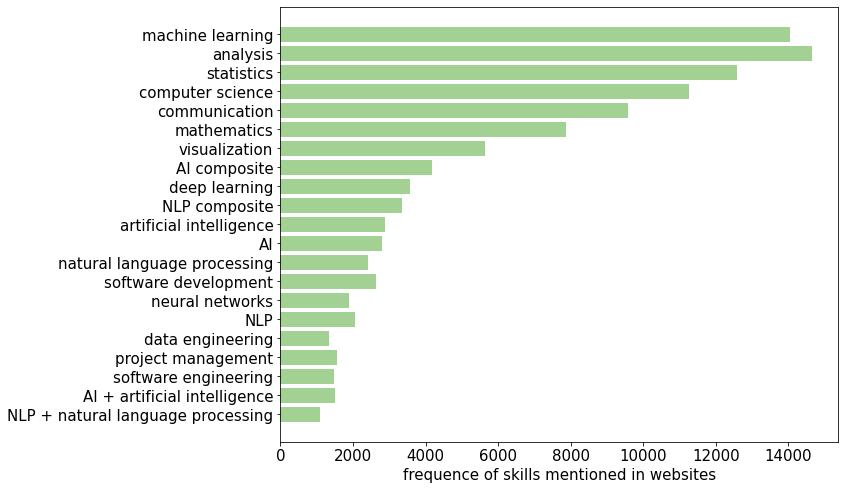

In [ ]:
#visualize the percentage of each skill
xaxis = np.array(df_new['Keyword'])
yaxis = np.array(df_new['sum_each_website'])

fig = plt.figure(figsize=(10,8))
plt.xlabel('frequence of skills mentioned in websites', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.barh(xaxis,yaxis,color=(0.4, 0.7, 0.3, 0.6))
plt.gca().invert_yaxis()

### Finding and Conclusion
According to this Kaggle dataset, it is observed that among several job finding websites, machine learning is the most basic and important data analysis skill required by every company. Some advanced data analysis skills such as NLP and AI are too hard for most job seekers, so these skills are not necessarily required by most companies. Thus, based on the results obtained, the content of data courses like MIE1624 are recommended to include machine learning, basic mathematical analysis, statistics as the most fundamental and important topics. This also means a large amount of time will be spent on these three topics. We will also design our curriculum based on the dendrogram and findings in Part 2. The detailed designing can be found in the report. 

# Part 3 Visualizations of course curriculum

In this part, we visualize sequence in which skills need to be learned as well as identifying skills that each course is teaching.

# 3.1 Sequence of skill learning

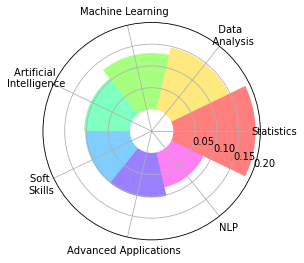

In [ ]:
N = 7
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

#Define catogory of skillsets, the importance of each skill is represented by the percentage
DA = df_new.loc[1,:].percentage+df_new.loc[16,:].percentage #analysis + data engineering
ML = df_new.loc[0,:].percentage #Machine Learning
NLP = df_new.loc[9,:].percentage+df_new.loc[12,:].percentage+df_new.loc[15,:].percentage+df_new.loc[20,:].percentage #NLP
AI = df_new.loc[7,:].percentage+df_new.loc[10,:].percentage+df_new.loc[11,:].percentage+df_new.loc[19,:].percentage #AI
SS = df_new.loc[4,:].percentage+df_new.loc[17,:].percentage #communication + project management
STATS = df_new.loc[2,:].percentage+df_new.loc[5,:].percentage #statistics + mathematics
APP = df_new.loc[6,:].percentage+df_new.loc[8,:].percentage+df_new.loc[14,:].percentage #deep learning + neural network + visualization

#store skillsets into a list
skillsets = [DA,ML,NLP,AI,SS,STATS,APP]
skillsets.sort(reverse=True)  #sort the values in descending order
skillsets

#value of r corresponds to percentage
r = np.array(skillsets)
width = np.array([0.4] * N)
label = ["Statistics", "  Data \n   Analysis", "Machine Learning", "Artificial    \nIntelligence   ", "Soft \nSkills", "Advanced Applications", "NLP"]
ax = plt.subplot(111, projection='polar')

#plot the importance of skills using polar bar chart
ax.set_rlim(-0.05, 0.2)
ax.set_rticks(np.arange(0.05, 0.2, 0.05))
ax.set_thetagrids(theta * 180 / np.pi)
ax.set_rlabel_position(-20)
colors = plt.cm.hsv(theta/2/np.pi)

ax.bar(x=theta, height=r, width=width+0.5, bottom=0, alpha=0.5, tick_label=label, color=colors)

plt.show()

# 3.2 Visulization of each course

In [ ]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
def make_spider( df, row, title, color):
 
  # number of variable
  categories = list(df)[1:]
  N = len(categories)
 
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
 
  # Initialise the spider plot
  plt.subplots_adjust(wspace=0.7)
  #ax = plt.subplot(2,3,row+1, polar=True)
  ax = plt.subplot(321, polar=True)
 
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
 
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='grey', size=8)
 
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([10,20,30], ["10","20","30"], color="grey", size=8)
  plt.ylim(0,40)
 
  # Ind1
  values=df.loc[row].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
 
  # Add a title
  plt.title(title, size=11, color=color, y=1.1)

In [ ]:
#Introductory Level
df1 = pd.DataFrame({
'group': ['Introduction to Machine Learning\n'],
'Regression algorithms': [33],
'       Classification \n       algorithms': [35],
'                Neural Network \n    and \n             Deep Learning': [23],
'Linear Algebra \nand Matrix': [28],
'Python Basics': [38],
'Statistics':[30],
'PCA+SVD':[25]
})

df2 = pd.DataFrame({
'group': ['Introduction to Big Data Science\n'],
'Hadoop Basics': [35],
'     SQL': [36],
'     Scala \nBasics': [37],
'Big Data Overview': [20],
'ML in spark':[26],
'Model \nDevelopment':[23],
'Data \nPreparation': [23]
})

df3 = pd.DataFrame({
'group': ['Statistics Methods in Machine Learning\n'],
'Probability': [37],
'     Hypothesis \nTesting': [34],
'     Inference': [31],
'Regression': [28],
'Expectation':[30],
'Model \nDevelopment':[25],
'Decision \nMaking': [23]
})

#Intermediate Level
df4 = pd.DataFrame({
'group': ['Natural Language Processing\n'],
'Advanced Python Programming': [40],
'Problem \nSolving': [28],
'Data \nVisualization': [26],
'Classfication and Clustering': [38],
'Machine \n Learning':[33],
'Big Data':[23]
})

df5 = pd.DataFrame({
'group': ['Introduction to Artificial Intelligence Principles\n'],
'Machine Learning': [34],
'     AI principles': [39],
'     Computer \nVision': [27],
'Recommender System': [23],
'Deep Learning':[26],
'Python \nProgramming':[38],
'Math and \nScience': [32]
})

df6 = pd.DataFrame({
'group': ['Communication and Leadership Strategy\n'],
'Communication': [39],
'     Problem\n      Solving': [31],
'     Collaboration': [30],
'Case Study': [26],
'Leadership':[38],
'Management':[33],
'Strategic \nThinking': [25]
})

#Advanced Level
df7 = pd.DataFrame({
'group': ['Deep Learning and Neural Network\n'],
'Advanced Python Programming': [35],
'Deep Learning': [39],
'Math and Statistics': [26],
'AI': [30],
'Machine \n Learning':[33],
'NLP':[24],
'Neural Network': [37]
})

df8 = pd.DataFrame({
'group': ['Advanced Machine Learning & AI Applications\n'],
'Tensorflow': [28],
'     Game\n      Theory': [30],
'     Robotics \nControl': [26],
'Reinforcement \nLearning': [33],
'Deep \n Learning':[36],
'Data \nAnalysis':[38],
'Face \nRecognition': [31]
})

df9 = pd.DataFrame({
'group': ['Project Management in Business\n'],
'Leadership and \nCommunication': [36],
'Management': [40],
'Scheduling \nOptimization': [35],
'Case \nStudy': [30],
'Business Insight':[28],
'Problem \nSolving':[32],
'Organization': [34]
})

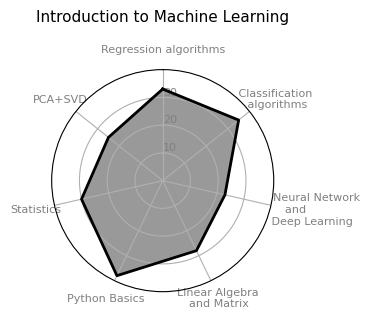

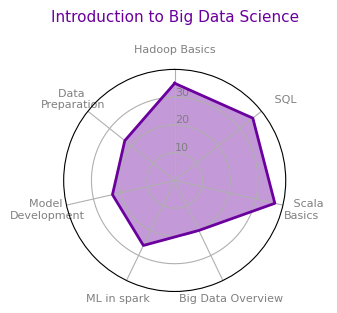

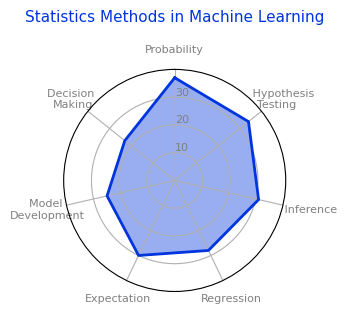

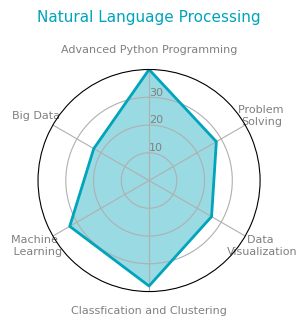

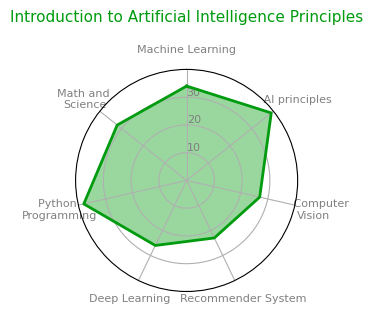

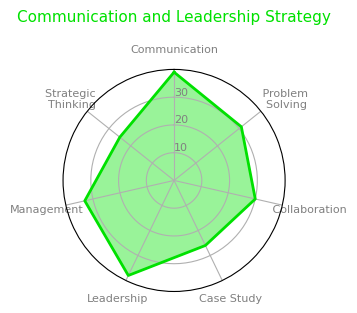

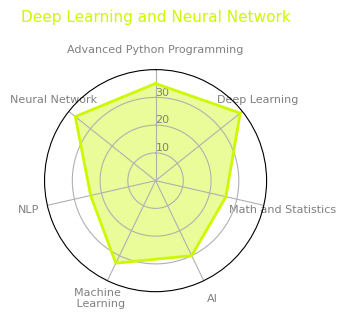

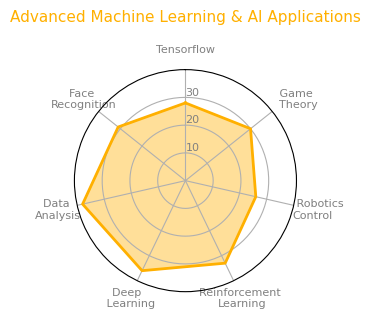

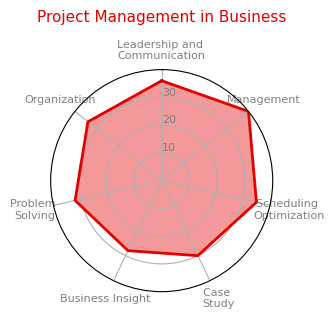

In [ ]:
#plot radar chart for all nine courses
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9] 

my_palette = plt.cm.get_cmap('nipy_spectral',10)

for i in range (0,9):
  my_dpi=100
  plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
  make_spider(df=dfs[i], row=0, title= dfs[i]['group'][0], color=my_palette(i))

**Findings and conclusion:**

According to the skill importance plot, statistics is the most important but fundamental skill, followed by data analysis, these two skills should be learned at first. Machine learning, Artificial Intelligence, soft skills and advanced application all have similar importance. However, as for NLP, it is not so critical, because it is existed as a technique, therefore, not every course/job will require NLP, so it is the least to be learned.

The radar plot uses polygons to explicitly demonstrate specific concentrations for unique skills and topics, thus students can use these graphs to quantitatively compare between courses and make their own decision on curriculum planning.


# Part 4 Online course delivery system 

In this part we will design a course recommandation system that learns the learning pattern of students and automatically recommand a sequence of courses based on students' preferences and the database of the system.

### 4.1 Web Scraping and Data Cleaning

"course_catalog.csv" is a file from Kaggle which is resulted from crawling the coursera website and used as the database for the recommandation system. It includes skills that each course will be providing and its catagory and associated sub-category. All the information will be used to train the recommandation system.

In [ ]:
df_courses = pd.read_csv("courses_catalog.csv")

In [ ]:
# check the table
df_courses.head()

,Unnamed: 0,course_name,course_link,university_name,course_type,university_logo,time_required,course_language,course_subtitles,course_skills,course_rating,category,sub_category,course_level
0,0,Atención prehospitalaria del ictus agudo y se...,https://www.coursera.org/learn/ictus-agudo-esc...,Universitat de Barcelona,COURSE,https://d3njjcbhbojbot.cloudfront.net/api/util...,Approx. 14 hours to complete,Spanish,Subtitles: Spanish,[],not-mentioned,Health,Patient Care,Intermediate Level
1,1,Brand & Content Marketing,https://www.coursera.org/learn/brand-and-conte...,IE Business School,COURSE,https://d3njjcbhbojbot.cloudfront.net/api/util...,Approx. 15 hours to complete,English,"Subtitles: French, Portuguese (Brazilian), Rus...",[],4.2stars,Arts and Humanities,History,Intermediate Level
2,2,Cluster Analysis using RCmdr,https://www.coursera.org/learn/cluster-analysi...,Coursera Project Network,GUIDED PROJECT,https://d3njjcbhbojbot.cloudfront.net/api/util...,one hour,English,English,"['Cluster Analysis', 'Dendrogram', 'K-Means Cl...",not-mentioned,Data Science,Data Analysis,"Subtitles: French, Portuguese (Brazilian), Rus..."
3,3,"Comercio, Inmigración y Tipos de Cambio en un...",https://www.coursera.org/learn/comercio-inmigr...,IE Business School,COURSE,https://d3njjcbhbojbot.cloudfront.net/api/util...,Approx. 11 hours to complete,Spanish,Subtitles: Spanish,[],not-mentioned,Social Sciences,Economics,Beginner Level
4,4,Create a Budget with Google Sheets,https://www.coursera.org/learn/create-a-budget...,Coursera Project Network,GUIDED PROJECT,https://d3njjcbhbojbot.cloudfront.net/api/util...,1 hour,English,English,"['Spreadsheet', 'Budget', 'Google Sheets', 'Te...",4.8stars,Business,Finance,Subtitles: Spanish


In [ ]:
df_courses = df_courses[["course_name","course_skills","category","sub_category","course_language"]]

In [ ]:
df_courses.head()

,course_name,course_skills,category,sub_category,course_language
0,Atención prehospitalaria del ictus agudo y se...,[],Health,Patient Care,Spanish
1,Brand & Content Marketing,[],Arts and Humanities,History,English
2,Cluster Analysis using RCmdr,"['Cluster Analysis', 'Dendrogram', 'K-Means Cl...",Data Science,Data Analysis,English
3,"Comercio, Inmigración y Tipos de Cambio en un...",[],Social Sciences,Economics,Spanish
4,Create a Budget with Google Sheets,"['Spreadsheet', 'Budget', 'Google Sheets', 'Te...",Business,Finance,English


In [ ]:
df_courses["category"].unique()

array(['Health', 'Arts and Humanities', 'Data Science', 'Social Sciences',
       'Business', 'Computer Science', 'Language Learning',
       'Information Technology', 'Physical Science and Engineering',
       'Math and Logic', 'Personal Development', 'not-mentioned'],
      dtype=object)

In [ ]:
# select relevant categories
df_courses  = df_courses.loc[df_courses['category'].isin(['Data Science','Computer Science', 
                                                          'Information Technology','Math and Logic'])]

In [ ]:
df_courses['course_skills'] = df_courses['course_skills'].apply(eval).apply(' '.join)
df_courses.index = df_courses['course_name']
df_courses = df_courses.drop(columns=['course_name'])

In [ ]:
df_courses.head()

,course_skills,category,sub_category,course_language
course_name,,,,
Cluster Analysis using RCmdr,Cluster Analysis Dendrogram K-Means Clustering...,Data Science,Data Analysis,English
Curso Completo de Spark con Databricks (Big Data),Spark SQL Machine Learning Spark Databricks Py...,Data Science,Data Analysis,not-mentioned
FPGA computing systems: Background knowledge and introductory materials,,Computer Science,Design and Product,English
IT Security: Defense against the digital dark arts,Cybersecurity Wireless Security Cryptography N...,Information Technology,Security,English
Intel® Network Academy - Network Transformation 101,Software-Defined Networking Internet Of Things...,Information Technology,Networking,English


In [ ]:
def clean_file_text(file):
    wordlist = []
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatiser = WordNetLemmatizer()
    stemmer = LancasterStemmer()
    
    for i in range(len(file)):
    # remove all URLs 
        new_file = re.sub(r"http\S+","", file[i])
    # remove html tags
        comp = re.compile('<.*?>')
        new_file = re.sub(comp, '', new_file)
        new_file = re.sub('[^A-Za-z0-9 ]+', '', new_file)
        new_file = re.sub(r'[?|$|.|!|@|&]',r'',new_file)
        new_file = new_file.lower()
        wordlist.append(new_file)
 
    return wordlist

In [ ]:
df_courses["sub_category"] = clean_file_text(df_courses["sub_category"].tolist())
df_courses["category"] = clean_file_text(df_courses["category"].tolist())
df_courses["course_skills"] = clean_file_text(df_courses["course_skills"].tolist())
df_courses["course_language"] = clean_file_text(df_courses["course_language"].tolist())

In [ ]:
df_courses

,course_skills,category,sub_category,course_language
course_name,,,,
Cluster Analysis using RCmdr,cluster analysis dendrogram kmeans clustering ...,data science,data analysis,english
Curso Completo de Spark con Databricks (Big Data),spark sql machine learning spark databricks py...,data science,data analysis,notmentioned
FPGA computing systems: Background knowledge and introductory materials,,computer science,design and product,english
IT Security: Defense against the digital dark arts,cybersecurity wireless security cryptography n...,information technology,security,english
Intel® Network Academy - Network Transformation 101,softwaredefined networking internet of things ...,information technology,networking,english
...,...,...,...,...
程序开发项目实践,,computer science,algorithms,chinese simplified
算法基础,,computer science,algorithms,chinese simplified
算法设计与分析 Design and Analysis of Algorithms,,computer science,algorithms,chinese simplified


### 4.2 Define keywords and encoding with keywords' frequency for all the courses 

After cleaning the text, we will define a list of keywords which are topics related to data science and machine learning. We are going to obtain the frequency of each keyword in the course skills description. After that, we will store the values of word-frequency in a matrix, in which rows are course titles and columns are keywords frequency.

In [ ]:
# define the key words
keyword = ["machine learning", "deep learning","reinforcement learning","data science", 
           "data analytics", "data engineer", "python" , " r " ," c ","nlp",
           "natural language processing","artificial intellegence"," ai ", "data analysis"
           "programming","data mining", "finance","computer vision","statistics",
           "supervised","unsupervised","linear algebra","jupyter","neural network",
           "modeling", "encoding","encode","excel","math","management", "visualize",
           "visualization", "sql", "statistical learning", "big data", "cloud computing",
           "tensorflow","statistics","convolutional","clustering","apache","big data",
           'testing', "linear regression","svm","tensorflow","data analysis","aws",
           "classification","gaussian","bayesian inference","scala","hadoop","mapreduce",
           "apache","spark","pyspark",'java', 'c++', 'matlab', 'sas','sql',"optimization",
           "hierarchical clustering","azure","bioinformatics","game theory","linux","tableau",
           "scala","java","pandas","sklearn","trees","cybersecurity","github","mysql"]

In [ ]:
# The function to count the key word frequency
def countkeyword(x):
    count = []    

    for i in keyword:
        count.append(x.count(i))

    return count

In [ ]:
# encoding and vectorize the word frequency
df_courses['count'] = 0
word_frequency = []

for k in range(df_courses.shape[0]):
  word_frequency.append(countkeyword(str(df_courses.iloc[k,0])))

df_count = pd.DataFrame(np.array(word_frequency))
df_count.columns = keyword
df_count.index = df_courses.index

In [ ]:
df_count.head()

,machine learning,deep learning,reinforcement learning,data science,data analytics,data engineer,python,r,c,nlp,natural language processing,artificial intellegence,ai,data analysisprogramming,data mining,finance,computer vision,statistics,supervised,unsupervised,linear algebra,jupyter,neural network,modeling,encoding,encode,excel,math,management,visualize,visualization,sql,statistical learning,big data,cloud computing,tensorflow,statistics,convolutional,clustering,apache,big data,testing,linear regression,svm,tensorflow,data analysis,aws,classification,gaussian,bayesian inference,scala,hadoop,mapreduce,apache,spark,pyspark,java,c++,matlab,sas,sql,optimization,hierarchical clustering,azure,bioinformatics,game theory,linux,tableau,scala,java,pandas,sklearn,trees,cybersecurity,github,mysql
course_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cluster Analysis using RCmdr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Curso Completo de Spark con Databricks (Big Data),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FPGA computing systems: Background knowledge and introductory materials,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IT Security: Defense against the digital dark arts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Intel® Network Academy - Network Transformation 101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# filter out courses that do not contain the key words
df_final = df_count.loc[~(df_count == 0).all(axis = 1)]

# assign the class for each course based on the key words
df_final['class'] = df_final.idxmax(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_final.head()

,machine learning,deep learning,reinforcement learning,data science,data analytics,data engineer,python,r,c,nlp,natural language processing,artificial intellegence,ai,data analysisprogramming,data mining,finance,computer vision,statistics,supervised,unsupervised,linear algebra,jupyter,neural network,modeling,encoding,encode,excel,math,management,visualize,visualization,sql,statistical learning,big data,cloud computing,tensorflow,statistics,convolutional,clustering,apache,big data,testing,linear regression,svm,tensorflow,data analysis,aws,classification,gaussian,bayesian inference,scala,hadoop,mapreduce,apache,spark,pyspark,java,c++,matlab,sas,sql,optimization,hierarchical clustering,azure,bioinformatics,game theory,linux,tableau,scala,java,pandas,sklearn,trees,cybersecurity,github,mysql,class
course_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cluster Analysis using RCmdr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,clustering
Curso Completo de Spark con Databricks (Big Data),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,spark
IT Security: Defense against the digital dark arts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,cybersecurity
JavaScript While Loop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,java
Non parametric Tests using R Cmdr,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,r


In [ ]:
# check all relevant topics
df_final['class'].unique().tolist()

['clustering',
 'spark',
 'cybersecurity',
 'java',
 ' r ',
 'deep learning',
 'machine learning',
 'supervised',
 'python',
 'aws',
 'management',
 'cloud computing',
 'apache',
 'sql',
 'data analysis',
 'tensorflow',
 'data science',
 'testing',
 'math',
 'azure',
 'big data',
 'tableau',
 'optimization',
 'linux',
 'linear regression',
 'neural network',
 ' ai ',
 'modeling',
 'statistics',
 'gaussian',
 'natural language processing',
 'scala',
 ' c ',
 'excel',
 'visualization',
 'classification',
 'bioinformatics',
 'reinforcement learning',
 'computer vision',
 'github',
 'matlab',
 'trees',
 'data mining',
 'sas',
 'game theory',
 'finance',
 'linear algebra']

In [ ]:
#  final dataset for the recommendation system
df_rs = df_final.iloc[:,:-1]
df_rs.head()

,machine learning,deep learning,reinforcement learning,data science,data analytics,data engineer,python,r,c,nlp,natural language processing,artificial intellegence,ai,data analysisprogramming,data mining,finance,computer vision,statistics,supervised,unsupervised,linear algebra,jupyter,neural network,modeling,encoding,encode,excel,math,management,visualize,visualization,sql,statistical learning,big data,cloud computing,tensorflow,statistics,convolutional,clustering,apache,big data,testing,linear regression,svm,tensorflow,data analysis,aws,classification,gaussian,bayesian inference,scala,hadoop,mapreduce,apache,spark,pyspark,java,c++,matlab,sas,sql,optimization,hierarchical clustering,azure,bioinformatics,game theory,linux,tableau,scala,java,pandas,sklearn,trees,cybersecurity,github,mysql
course_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cluster Analysis using RCmdr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Curso Completo de Spark con Databricks (Big Data),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IT Security: Defense against the digital dark arts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
JavaScript While Loop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Non parametric Tests using R Cmdr,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.3 Use Pearson Coefficient of Correlation to Build the Recommendation System

After encoding with word frequency for all courses, min-max scaling is applied due to data sparsity for each sample course. In this recommadation system, students' preferenes with respect to all the courses in the database are used as the input vector. For instance, 1 is assigned to the selected topics and 0 for the rest. Then, the system will recommand courses based students' perferences according to the pearson coefficient of correlation (a measure of the strength of the association between the two variables) between the student's preference and each course. The courses with top K pearson coefficients will be recommended to students. 

In [ ]:
# calculate pearson coefficients and select the top ranked courses
def course_recommender(x):
  preference = []

  for i in range(df_rs.shape[0]):
    sample = minmax_scale(np.array(df_rs.iloc[i,:]))
    pcc = pearsonr(x, sample)[0]
    preference.append(pcc)
  
  df_1 = df_rs.copy()  
  df_1['sorting'] = preference
  df_1 = df_1.sort_values(by = ['sorting'])
  top_k = df_1.index.to_list()[-6:-1][::-1]
  
  return top_k

In [ ]:
# sampe testing
courses = list(df_rs.columns) # These are the available topics
sample_student = np.random.randint(2, size = len(courses))  # randomly select topics that students are intereted
course_recommender(sample_student) # recommended courses

['Advanced Linear Models for Data Science 1: Least Squares',
 'Bayesian Statistics',
 'Data Science Capstone',
 'Знакомство с R и базовая статистика',
 'Language Classification with Naive Bayes in Python']

### 4.4 Sample Recommandation System


In reality, we cannot ask the student about all the relevant courses. Therefore, we need to automatically transform the student's prefered topics to the vector. Also, we should allow the student to choose the number of courses they want to take. 

In [ ]:
def recommandation_system(interests, courses):
  index_list = []
  topics = list(df_rs.columns)

  for topic in interests:
    index_list.append(topics.index(topic))

  index_list
  student = np.zeros(len(topics))

  for i in range(len(index_list)):
    student[index_list[i]] = 1

  def recommender(x):
    preference = []
    
    for i in range(df_rs.shape[0]):
      sample = minmax_scale(np.array(df_rs.iloc[i,:]))
      per = pearsonr(x, sample)[0]
      preference.append(per)
    return preference

  def course_selected(preference):
    df_2 = df_rs.copy()
    df_2['sorting'] = preference
    df_2 = df_2.sort_values(by = ['sorting'])
    k = df_2.index.to_list()[-(courses + 1):-1][::-1]
    return k

  return course_selected(recommender(student))

#### 4.4.1 Testing
Recommand 5 courses bases on 2 topics


In [ ]:
recommandation_system(['convolutional','machine learning'],5)

['Generando modelos con Auto Machine Learning',
 'Image Compression and Generation using Variational Autoencoders in Python',
 'Serve Scikit-Learn Models for Deployment with BentoML',
 'Text Retrieval and Search Engines',
 'Curso Completo de Machine Learning en Microsoft Power BI ']

Recommand 10 courses bases on 1 topic

In [ ]:
recommandation_system(['big data'],10)

['Big Data - Capstone Project',
 'Introducción a Azure Data Factory para Big Data',
 'Deploying Machine Learning Models',
 'Simulating Time Series Data by Parallel Computing in Python',
 'Google Cloud Platform Big Data and Machine Learning Fundamentals en Español',
 'Cloud Computing Applications, Part 2: Big Data and Applications in the Cloud',
 'Mejores prácticas para el procesamiento de datos en Big Data',
 'Analysing Unstructured Data using MongoDB and PySpark',
 'Big Data Modeling and Management Systems',
 'Data-driven Decision Making']

#### 4.4.2 Conclusion


The finding is that the word-frequency based recommendation system works well. Most of the returned courses are related to the topics selected. For instance, if we search for courses related to “Big Data”, the selected courses are related to big-data based on human judgment. There are 2 key features that make our system special. Firstly, each recommended course will likely cover all the topics selected by the user because of the Pearson Coefficient, regardless of the number of topics. For example, if we search for "convolutional" and "machine learning", the top-ranked English course is "Image Compression and Generation using Variational Autoencoder in Python", which is a concrete machine learning course. Although the course name itself does not seem related, it covers both machine learning, deep learning, and convolutional neural networks according to the course skill description in the “course_catalog.csv" file. The second key feature is that our system does not make recommendations based on the course titles, instead, the recommendation is based on the skills the courses provide since the model is based on the key-word frequency. Finally, the recommendation is that the simplified version of the recommendation system is informative and useful, and there is potential in the market. 